In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import mean_squared_error
from tensorflow import keras
from tensorflow.keras.layers import SimpleRNN, LSTM, Dropout, Flatten, Dense
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential

In [2]:
# This code imports the data you generated before for replicating.

stock_prices = pd.read_csv('stock_prices.csv')
arima_predictions_T = pd.read_csv('arima_predictions_T')
arima_predictions_VZ = pd.read_csv('arima_predictions_VZ')

diff_T = stock_prices['T'].diff().dropna()
diff_VZ = stock_prices['VZ'].diff().dropna()

split = int(len(diff_T.values)*0.95)
diff_train_T = diff_T.iloc[:split]
diff_test_T = diff_T.iloc[split:]
diff_train_VZ = diff_VZ.iloc[:split]
diff_test_VZ = diff_VZ.iloc[split:]

In [3]:
n_steps = 10
n_features = 1

In [4]:
# This code is imported from the previous milestone for replicating.

def split_sequence(sequence, n_steps):
    X, y = [], []
    for i in range(len(sequence)):
        end_ix = i + n_steps
        if end_ix > len(sequence) - 1:
            break
        seq_x, seq_y = sequence[i:end_ix], sequence[end_ix]
        X.append(seq_x)
        y.append(seq_y)
    return np.array(X), np.array(y)

In [5]:
# This code is imported from the previous milestone for replicating.

X_diff_train_T, y_diff_train_T = split_sequence(diff_train_T, n_steps)
X_diff_train_T = X_diff_train_T.reshape((X_diff_train_T.shape[0],
                                         X_diff_train_T.shape[1], n_features))

X_diff_test_T, y_diff_test_T = split_sequence(diff_test_T.values, n_steps)
X_diff_test_T = X_diff_test_T.reshape((X_diff_test_T.shape[0],
                                       X_diff_test_T.shape[1], n_features))



In [6]:

X_diff_train_VZ, y_diff_train_VZ = split_sequence(diff_train_VZ, n_steps)
X_diff_train_VZ = X_diff_train_VZ.reshape((X_diff_train_VZ.shape[0],
                                         X_diff_train_VZ.shape[1], n_features))


X_diff_test_VZ, y_diff_test_VZ = split_sequence(diff_test_VZ.values, n_steps)
X_diff_test_VZ = X_diff_test_VZ.reshape((X_diff_test_VZ.shape[0],
                                       X_diff_test_VZ.shape[1], n_features))

In [7]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(256,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model

In [8]:
LSTM_model = LSTM_part()
history_LSTM = LSTM_model.fit(X_diff_train_T, y_diff_train_T,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 2s 473ms/step - loss: 0.4006 - mse: 0.4006 - val_loss: 0.0985 - val_mse: 0.0985
Epoch 2/200
2/2 [==============================] - 0s 67ms/step - loss: 0.3875 - mse: 0.3875 - val_loss: 0.0988 - val_mse: 0.0988
Epoch 3/200
2/2 [==============================] - 0s 67ms/step - loss: 0.3753 - mse: 0.3753 - val_loss: 0.0992 - val_mse: 0.0992
Epoch 4/200
2/2 [==============================] - 0s 70ms/step - loss: 0.3649 - mse: 0.3649 - val_loss: 0.0998 - val_mse: 0.0998
Epoch 5/200
2/2 [==============================] - 0s 66ms/step - loss: 0.3577 - mse: 0.3577 - val_loss: 0.1009 - val_mse: 0.1009
Epoch 6/200
2/2 [==============================] - 0s 110ms/step - loss: 0.3500 - mse: 0.3500 - val_loss: 0.1015 - val_mse: 0.1015
Epoch 7/200
2/2 [==============================] - 0s 66ms/step - loss: 0.3413 - mse: 0.3413 - val_loss: 0.1003 - val_mse: 0.1003
Epoch 8/200
2/2 [==============================] - 0s 73ms/step - loss: 0.3335 - mse: 0.

2/2 [==============================] - 0s 92ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 7.9588e-04 - val_mse: 7.9588e-04
Epoch 63/200
2/2 [==============================] - 0s 87ms/step - loss: 0.0041 - mse: 0.0041 - val_loss: 6.6204e-04 - val_mse: 6.6204e-04
Epoch 64/200
2/2 [==============================] - 0s 96ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 3.1559e-04 - val_mse: 3.1559e-04
Epoch 65/200
2/2 [==============================] - 0s 87ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 2.8746e-04 - val_mse: 2.8746e-04
Epoch 66/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 3.7792e-04 - val_mse: 3.7792e-04
Epoch 67/200
2/2 [==============================] - 0s 86ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 2.6283e-04 - val_mse: 2.6283e-04
Epoch 68/200
2/2 [==============================] - 0s 91ms/step - loss: 0.0037 - mse: 0.0037 - val_loss: 5.0569e-04 - val_mse: 5.0569e-04
Epoch 69/200
2/2 [======================

Epoch 121/200
2/2 [==============================] - 0s 90ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 6.2833e-05 - val_mse: 6.2833e-05
Epoch 122/200
2/2 [==============================] - 0s 93ms/step - loss: 0.0019 - mse: 0.0019 - val_loss: 8.7896e-05 - val_mse: 8.7896e-05
Epoch 123/200
2/2 [==============================] - 0s 82ms/step - loss: 0.0016 - mse: 0.0016 - val_loss: 9.2445e-05 - val_mse: 9.2445e-05
Epoch 124/200
2/2 [==============================] - 0s 95ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 1.2210e-04 - val_mse: 1.2210e-04
Epoch 125/200
2/2 [==============================] - 0s 86ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 1.0196e-04 - val_mse: 1.0196e-04
Epoch 126/200
2/2 [==============================] - 0s 101ms/step - loss: 0.0015 - mse: 0.0015 - val_loss: 5.7378e-05 - val_mse: 5.7378e-05
Epoch 127/200
2/2 [==============================] - 0s 87ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 8.0307e-05 - val_mse: 8.0307e-05
Epoch 128/200
2/2 [

2/2 [==============================] - 0s 84ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 1.4343e-04 - val_mse: 1.4343e-04
Epoch 180/200
2/2 [==============================] - 0s 95ms/step - loss: 0.0017 - mse: 0.0017 - val_loss: 7.5714e-05 - val_mse: 7.5714e-05
Epoch 181/200
2/2 [==============================] - 0s 79ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 1.0909e-04 - val_mse: 1.0909e-04
Epoch 182/200
2/2 [==============================] - 0s 84ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.4213e-04 - val_mse: 1.4213e-04
Epoch 183/200
2/2 [==============================] - 0s 90ms/step - loss: 0.0011 - mse: 0.0011 - val_loss: 6.7240e-05 - val_mse: 6.7240e-05
Epoch 184/200
2/2 [==============================] - 0s 95ms/step - loss: 0.0014 - mse: 0.0014 - val_loss: 1.2747e-04 - val_mse: 1.2747e-04
Epoch 185/200
2/2 [==============================] - 0s 113ms/step - loss: 0.0012 - mse: 0.0012 - val_loss: 3.8289e-05 - val_mse: 3.8289e-05
Epoch 186/200
2/2 [==============

In [9]:
start = X_diff_test_T[X_diff_test_T.shape[0]-1]
T_input = start
T_input = T_input.reshape((1, n_steps, n_features))

In [10]:
predictions_LSTM_T = []

for i in range(len(arima_predictions_T)):
    T_input = T_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(T_input, verbose=0)
    T_input = np.append(T_input, yhat_lstm)
    T_input = T_input[1:]
    predictions_LSTM_T.append(yhat_lstm)

In [11]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [12]:
print('RMSE of AT&T for LSTM model {:.4f}'\
      .format(rmse(diff_test_T, np.array(predictions_LSTM_T).flatten())))

RMSE of AT&T for LSTM model 0.4379


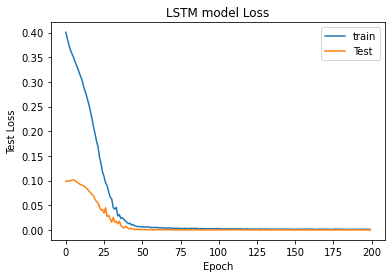

In [13]:
plt.plot(history_LSTM.history['loss'])
plt.plot(history_LSTM.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()

Even though the structure of LSTM is different than that of RNN, it shows a very similar performance, indicating that we do not need very complex structure to model this data.

In [14]:
def LSTM_part():
    model = Sequential()
    model.add(LSTM(128,
              input_shape=(n_steps, n_features),
              return_sequences=True))
    model.add(Dropout(0.1))
    model.add(Flatten())
    model.add(Dense(1))
    model.compile(optimizer = 'adam' , loss='mean_squared_error',metrics=['mse'])
    return model

In [15]:
LSTM_model = LSTM_part()
history_LSTM_VZ = LSTM_model.fit(X_diff_train_VZ, y_diff_train_VZ,
                            batch_size=200,
                            epochs=200,
                            validation_split=0.2)

Epoch 1/200
2/2 [==============================] - 2s 344ms/step - loss: 0.6296 - mse: 0.6296 - val_loss: 0.2151 - val_mse: 0.2151
Epoch 2/200
2/2 [==============================] - 0s 34ms/step - loss: 0.6173 - mse: 0.6173 - val_loss: 0.2138 - val_mse: 0.2138
Epoch 3/200
2/2 [==============================] - 0s 33ms/step - loss: 0.6067 - mse: 0.6067 - val_loss: 0.2117 - val_mse: 0.2117
Epoch 4/200
2/2 [==============================] - 0s 34ms/step - loss: 0.5935 - mse: 0.5935 - val_loss: 0.2099 - val_mse: 0.2099
Epoch 5/200
2/2 [==============================] - 0s 33ms/step - loss: 0.5852 - mse: 0.5852 - val_loss: 0.2084 - val_mse: 0.2084
Epoch 6/200
2/2 [==============================] - 0s 32ms/step - loss: 0.5740 - mse: 0.5740 - val_loss: 0.2065 - val_mse: 0.2065
Epoch 7/200
2/2 [==============================] - 0s 32ms/step - loss: 0.5625 - mse: 0.5625 - val_loss: 0.2045 - val_mse: 0.2045
Epoch 8/200
2/2 [==============================] - 0s 35ms/step - loss: 0.5579 - mse: 0.5

2/2 [==============================] - 0s 38ms/step - loss: 0.0110 - mse: 0.0110 - val_loss: 0.0027 - val_mse: 0.0027
Epoch 64/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0117 - mse: 0.0117 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 65/200
2/2 [==============================] - 0s 65ms/step - loss: 0.0097 - mse: 0.0097 - val_loss: 0.0018 - val_mse: 0.0018
Epoch 66/200
2/2 [==============================] - 0s 51ms/step - loss: 0.0131 - mse: 0.0131 - val_loss: 0.0025 - val_mse: 0.0025
Epoch 67/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0102 - mse: 0.0102 - val_loss: 0.0014 - val_mse: 0.0014
Epoch 68/200
2/2 [==============================] - 0s 37ms/step - loss: 0.0105 - mse: 0.0105 - val_loss: 0.0016 - val_mse: 0.0016
Epoch 69/200
2/2 [==============================] - 0s 41ms/step - loss: 0.0077 - mse: 0.0077 - val_loss: 0.0022 - val_mse: 0.0022
Epoch 70/200
2/2 [==============================] - 0s 36ms/step - loss: 0.0080 - mse: 0.0080 - 

Epoch 124/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 5.3882e-04 - val_mse: 5.3882e-04
Epoch 125/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0046 - mse: 0.0046 - val_loss: 3.8210e-04 - val_mse: 3.8210e-04
Epoch 126/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0050 - mse: 0.0050 - val_loss: 7.5406e-04 - val_mse: 7.5406e-04
Epoch 127/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0042 - mse: 0.0042 - val_loss: 5.3861e-04 - val_mse: 5.3861e-04
Epoch 128/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0045 - mse: 0.0045 - val_loss: 5.9251e-04 - val_mse: 5.9251e-04
Epoch 129/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0049 - mse: 0.0049 - val_loss: 6.4001e-04 - val_mse: 6.4001e-04
Epoch 130/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0047 - mse: 0.0047 - val_loss: 3.8087e-04 - val_mse: 3.8087e-04
Epoch 131/200
2/2 [=

2/2 [==============================] - 0s 35ms/step - loss: 0.0036 - mse: 0.0036 - val_loss: 2.0832e-04 - val_mse: 2.0832e-04
Epoch 183/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 3.2986e-04 - val_mse: 3.2986e-04
Epoch 184/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0035 - mse: 0.0035 - val_loss: 4.6077e-04 - val_mse: 4.6077e-04
Epoch 185/200
2/2 [==============================] - 0s 33ms/step - loss: 0.0033 - mse: 0.0033 - val_loss: 3.0908e-04 - val_mse: 3.0908e-04
Epoch 186/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0031 - mse: 0.0031 - val_loss: 2.3739e-04 - val_mse: 2.3739e-04
Epoch 187/200
2/2 [==============================] - 0s 35ms/step - loss: 0.0034 - mse: 0.0034 - val_loss: 2.7492e-04 - val_mse: 2.7492e-04
Epoch 188/200
2/2 [==============================] - 0s 34ms/step - loss: 0.0029 - mse: 0.0029 - val_loss: 4.1315e-04 - val_mse: 4.1315e-04
Epoch 189/200
2/2 [===============

In [16]:
start = X_diff_train_VZ[X_diff_train_VZ.shape[0]-1]
VZ_input = start
VZ_input = VZ_input.reshape((1, n_steps, n_features))

In [17]:
predictions_LSTM_VZ = []

for i in range(len(arima_predictions_VZ)):
    VZ_input = VZ_input.reshape((1, n_steps, n_features))
    yhat_lstm = LSTM_model.predict(VZ_input, verbose=0)
    VZ_input = np.append(T_input, yhat_lstm)
    VZ_input = VZ_input[1:]
    predictions_LSTM_VZ.append(yhat_lstm)

In [18]:
def rmse(y,yhat):
    return np.sqrt(mean_squared_error(y,yhat))

In [19]:
print('RMSE of VZ for LSTM model {:.4f}'\
      .format(rmse(diff_test_VZ, np.array(predictions_LSTM_VZ).flatten())))

RMSE of VZ for LSTM model 0.4570


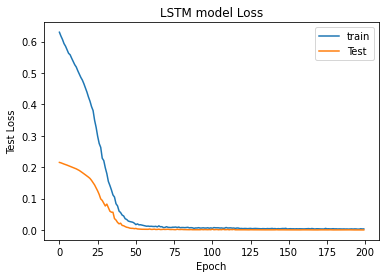

In [20]:
plt.plot(history_LSTM_VZ.history['loss'])
plt.plot(history_LSTM_VZ.history['val_loss'])
plt.title('LSTM model Loss')
plt.ylabel('Test Loss')
plt.xlabel('Epoch')
plt.legend(['train', 'Test'], loc='best')
plt.show()